<h1 style="color:brown;">  Hands on practice with neural network</h1> 

### Lesson plan

1. How to evaluate a model? <a href="https://colah.github.io/posts/2015-09-Visual-Information/">cross-entropy</a>
2. Types of Neural Nets
3. Keras & Tensorflow - specialized framework (python library) for machine learning
4. Hands on image reconstruction with Keras (approximately PCA)

### Getting data

[Cats-Dogs](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip)

### Basic Architecture of Keras

The __core__ data structure of Keras is a __model__. The simplest type of model is `Sequential`.

In [7]:
import keras

In [21]:
from keras.models import Sequential

model = Sequential()

Once we instantiated the model now we can add layers to it.

In [22]:
from keras.layers import Dense

model.add(Dense(units = 64, activation = 'relu', input_dim = 20))
model.add(Dense(units = 10, activation = 'softmax'))

After we finish the designing the model we should compile it. So you can think of this process as keras creates a to-do list for the tasks.

In [56]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Note that if we want to we can be more flexible in our choices:

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True))

We will create synthetic data here as a starter later we will work with cooler datasets too.

In [50]:
import numpy as np

In [51]:
x_train = np.random.random((1000,20))
x_train

array([[0.24179125, 0.16401884, 0.17097692, ..., 0.66475417, 0.25094712,
        0.94724212],
       [0.29529428, 0.43194313, 0.82005662, ..., 0.77597834, 0.3623453 ,
        0.37832259],
       [0.93861822, 0.37242414, 0.57774259, ..., 0.12106796, 0.59534493,
        0.86128625],
       ...,
       [0.43004899, 0.08120242, 0.90924067, ..., 0.84923787, 0.36099946,
        0.38214066],
       [0.41773   , 0.10930848, 0.22758007, ..., 0.82119105, 0.47355742,
        0.0668471 ],
       [0.39399366, 0.31642758, 0.30135133, ..., 0.70775719, 0.57768512,
        0.73655894]])

In [62]:
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((1000, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

Note that instead of recording the labels with numbers we converted them to one-hot-encoded vectors.

In [63]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


Why do we have 1344 and 560 parameters?

In [65]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split= 0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 0s 33us/step - loss: 2.9105 - accuracy: 0.0922 - val_loss: 2.6673 - val_accuracy: 0.1900
Epoch 2/100
900/900 [==============================] - 0s 33us/step - loss: 2.7776 - accuracy: 0.1044 - val_loss: 2.6413 - val_accuracy: 0.1500
Epoch 3/100
900/900 [==============================] - 0s 25us/step - loss: 2.6915 - accuracy: 0.1067 - val_loss: 2.5858 - val_accuracy: 0.1300
Epoch 4/100
900/900 [==============================] - 0s 28us/step - loss: 2.6358 - accuracy: 0.1089 - val_loss: 2.5667 - val_accuracy: 0.1700
Epoch 5/100
900/900 [==============================] - 0s 27us/step - loss: 2.5854 - accuracy: 0.1156 - val_loss: 2.5335 - val_accuracy: 0.1400
Epoch 6/100
900/900 [==============================] - 0s 31us/step - loss: 2.5525 - accuracy: 0.1222 - val_loss: 2.5180 - val_accuracy: 0.1600
Epoch 7/100
900/900 [==============================] - 0s 26us/step - loss: 2.5151 - accur

900/900 [==============================] - 0s 26us/step - loss: 2.1302 - accuracy: 0.2322 - val_loss: 2.4287 - val_accuracy: 0.1400
Epoch 58/100
900/900 [==============================] - 0s 26us/step - loss: 2.1254 - accuracy: 0.2344 - val_loss: 2.4305 - val_accuracy: 0.1600
Epoch 59/100
900/900 [==============================] - 0s 23us/step - loss: 2.1234 - accuracy: 0.2300 - val_loss: 2.4346 - val_accuracy: 0.1400
Epoch 60/100
900/900 [==============================] - 0s 24us/step - loss: 2.1180 - accuracy: 0.2367 - val_loss: 2.4285 - val_accuracy: 0.1500
Epoch 61/100
900/900 [==============================] - 0s 23us/step - loss: 2.1151 - accuracy: 0.2422 - val_loss: 2.4258 - val_accuracy: 0.1500
Epoch 62/100
900/900 [==============================] - 0s 23us/step - loss: 2.1129 - accuracy: 0.2467 - val_loss: 2.4341 - val_accuracy: 0.1500
Epoch 63/100
900/900 [==============================] - 0s 23us/step - loss: 2.1079 - accuracy: 0.2467 - val_loss: 2.4408 - val_accuracy: 0.150

- Batch size??

[Batch explained](https://www.youtube.com/watch?v=U4WB9p6ODjM)

After we fit a model we can make predictions and evaluations:

In [66]:
model.evaluate(x_test, y_test, batch_size=32)

1000/1000 [==============================] - 0s 17us/step


[2.540529935836792, 0.10599999874830246]

In [67]:
model.metrics_names

['loss', 'accuracy']

### Some types of neural networks  

- Classic - what we did on Friday
- Auto-encoder (like PCA finding compressed representation) - now

the hidden layer is an encoding of the generalization
- Recurrent neural network - coming soon
- Convlutional neural networks - coming soon

![](./img/RNN.png)

![](./img/CNN.png)

![](./img/autorec.png)

### 3. Tensorflow and Keras
##### An Example

### Image Classification
[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) is a common benchmark in machine learning for image recognition. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img align =left src="./img/c10imgcat.png">

<img align =left src="./img/tf-logo3.png"><br>


This task can be accomplished in TensorFlow and the code can be found [here](https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10/). Let's look at it together. 

<img align =left src="./img/keras.png"><br>

Now, the same task in [in Keras](https://keras.io/examples/cifar10_cnn/). After looking at it and comparing it to the tensorflow code, what do you notice? Any formatting look familiar?

In [69]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10

save_dir = os.path.join(os.getcwd(), 'saved_models')
print(save_dir)
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



/Users/muratguner/Documents/lectures/dc-ds-021720/mod-4/week-2/day-4-nn-2/saved_models
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [70]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
x_test.shape

(10000, 32, 32, 3)

In [72]:
x_train.shape[1:]

(32, 32, 3)

In [73]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [4]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.7185 - accuracy: 0.3644 - val_loss: 1.2659 - val_accuracy: 0.5371
Epoch 2/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.3257 - accuracy: 0.5208 - val_loss: 1.1250 - val_accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.1945 - accuracy: 0.5697 - val_loss: 1.0366 - val_accuracy: 0.6309
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1273 - accuracy: 0.5952 - val_loss: 0.9944 - val_accuracy: 0.6509
Epoch 5/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.0662 - accuracy: 0.6214 - val_loss: 0.9478 - val_accuracy: 0.6680
Epoch 6/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.0294 - accuracy: 0.6343 - val_loss: 0.8767 - val_accuracy: 0.6911
Epoch 7/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.00

In [19]:
!ls -lath saved_models/

total 19640
drwxr-xr-x  7 enkeboll  staff   224B Mar 30 14:42 ..
-rw-r--r--  1 enkeboll  staff   9.6M Mar 30 11:58 keras_cifar10_trained_model.h5
drwxr-xr-x  3 enkeboll  staff    96B Mar 30 11:58 .


### Similar to another scenario we've seen:

![statsmodels](./img/statsmodels_hybi_banner.png)

vs

![sklearn](./img/sklearn.png )

### Okay, but should I use Keras or Tensorflow?
![wrong question](https://www.pyimagesearch.com/wp-content/uploads/2018/10/keras_vs_tensorflow_wrong_question.jpg)

### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](./img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](./img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](./img/cat-tensors.gif)

## TensorFlow at its start

An open-source library

![more-arch](./img/layers.png)

### 2007 Keras was fully integrated into TensorFlow

It "comes with" Tensorflow and provides all the medium to high end API services to integrate with tensorflow processing.

![tensorflow-prog](./img/tensorflow_programming_environment.png)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit mroe complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](./img/levers.jpeg)

### Building our first Neural Network - Auto-encoder

#### Install Keras & tensorflow

In [ ]:
#!pip install tensorflow
#!pip install keras

### Keras basic syntax 

<a href="https://keras.io">Documentation</a>

In [20]:
import keras

In [21]:
## initialize the model
from keras.models import Sequential
from keras.layers import Input, Dense
model = Sequential()

In [ ]:
## prepare a placeholder for input
# this is our input placeholder
inp = Input(shape=(784,)) # here shape (784, ) means we specify only the number of rows but we can input as many columns as we would like

In [22]:
## Adding layers --> simple as .add()
## Dense means linear layer + activation
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [23]:
# Option I - gradient descent
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mae', 'acc'])

# Option II - adadelta
# model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

<a href="https://keras.io/optimizers/">more optimizers</a>

In [25]:
# Training the model!
import numpy as np
X_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
X_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical( np.random.randint(10, size=(100, 1)), num_classes=10)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=20,
                    validation_data=(X_test, y_test))

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 0s 123us/step - loss: 0.0912 - mae: 0.1800 - acc: 0.1020 - val_loss: 0.0907 - val_mae: 0.1799 - val_acc: 0.0600
Epoch 2/20
1000/1000 [==============================] - 0s 9us/step - loss: 0.0905 - mae: 0.1799 - acc: 0.0890 - val_loss: 0.0902 - val_mae: 0.1798 - val_acc: 0.1300
Epoch 3/20
1000/1000 [==============================] - 0s 10us/step - loss: 0.0902 - mae: 0.1799 - acc: 0.0900 - val_loss: 0.0900 - val_mae: 0.1798 - val_acc: 0.1200
Epoch 4/20
1000/1000 [==============================] - 0s 10us/step - loss: 0.0901 - mae: 0.1798 - acc: 0.0930 - val_loss: 0.0900 - val_mae: 0.1798 - val_acc: 0.1000
Epoch 5/20
1000/1000 [==============================] - 0s 12us/step - loss: 0.0899 - mae: 0.1797 - acc: 0.0980 - val_loss: 0.0900 - val_mae: 0.1798 - val_acc: 0.1100
Epoch 6/20
1000/1000 [==============================] - 0s 13us/step - loss: 0.0899 - mae: 0.1796 - acc: 0.1090 - val_

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Results of the model over epochs
history.history['val_loss']

[0.09070304036140442,
 0.0902041494846344,
 0.09001725912094116,
 0.09000051766633987,
 0.09002899378538132,
 0.09001795947551727,
 0.09004031866788864,
 0.09004038572311401,
 0.09004490077495575,
 0.0900338739156723,
 0.09005045890808105,
 0.09003795683383942,
 0.09001076966524124,
 0.09005356580018997,
 0.09007259458303452,
 0.09011571854352951,
 0.09014006704092026,
 0.09016377478837967,
 0.09011721611022949,
 0.09012818336486816]

In [28]:
history.history['loss']

[0.09117713183164597,
 0.09050719857215882,
 0.0902040297985077,
 0.09005778712034225,
 0.08994459700584412,
 0.08986586564779282,
 0.08981417626142502,
 0.08976035231351852,
 0.08970240968465805,
 0.08964460253715516,
 0.08959879595041274,
 0.08954498118162155,
 0.08949269199371337,
 0.08943835133314133,
 0.08939434015750886,
 0.08934955310821534,
 0.08930271494388581,
 0.08925906550884247,
 0.08921199429035187,
 0.0891588990688324]

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [30]:
## Evaluate
loss_and_metrics = model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 26us/step


In [31]:
loss_and_metrics

[0.09012816965579987, 0.17976999282836914, 0.10999999940395355]

In [32]:
### Useful
model.save('./model.h5') # Save your weights and computational graph
from keras.models import load_model
load_model('./model.h5') # loading the saved model from above

In [33]:
!ls -lah

total 184
drwxr-xr-x   8 enkeboll  staff   256B Mar 30 15:19 .
drwxr-xr-x  10 enkeboll  staff   320B Mar 30 10:32 ..
-rw-r--r--@  1 enkeboll  staff   6.0K Mar 30 10:29 .DS_Store
drwxr-xr-x   4 enkeboll  staff   128B Mar 30 10:33 .ipynb_checkpoints
drwxr-xr-x  16 enkeboll  staff   512B Oct  7 14:39 img
-rwxr-xr-x   1 enkeboll  staff    37K Mar 30 15:18 intro-to-keras.ipynb
-rw-r--r--   1 enkeboll  staff    44K Mar 30 15:19 model.h5
drwxr-xr-x   3 enkeboll  staff    96B Mar 30 11:58 saved_models


In [34]:
from keras.applications.vgg16 import VGG16

In [37]:
model = VGG16(weights='imagenet', include_top=False)
model.save('./vgg16.h5')

In [36]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [38]:
ls -lath

total 115288
-rw-r--r--   1 enkeboll  staff    56M Mar 30 15:22 vgg16.h5
drwxr-xr-x   9 enkeboll  staff   288B Mar 30 15:22 ./
-rwxr-xr-x   1 enkeboll  staff    45K Mar 30 15:22 intro-to-keras.ipynb*
-rw-r--r--   1 enkeboll  staff    44K Mar 30 15:19 model.h5
drwxr-xr-x   3 enkeboll  staff    96B Mar 30 11:58 saved_models/
drwxr-xr-x   4 enkeboll  staff   128B Mar 30 10:33 .ipynb_checkpoints/
drwxr-xr-x  10 enkeboll  staff   320B Mar 30 10:32 ../
-rw-r--r--@  1 enkeboll  staff   6.0K Mar 30 10:29 .DS_Store
drwxr-xr-x  16 enkeboll  staff   512B Oct  7 14:39 img/


### Your exercise:  Image reconstruction using auto-encoder

##### Import dataset - Mnist (handwritten digits)

In [39]:
import os

In [40]:
import matplotlib.pyplot as plt

In [41]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model, Input
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, BatchNormalization
from keras.utils import np_utils

In [ ]:
### a. Load the Mnist dataset and split to train/test (use mnist.load_data())
### b. Plot few images with their label
### c. reshape images to 784 dim vector and normalize (divide by 255)
### d. Create a new model with 1 Dense layers sized 32 (encoder) with relu layer. 
### Then add a dense layer sized 784 with sigmoid activation.
### Run it for 50 epochs with batches of 256. Use binary cross-entropy. 
### e. Plot the model loss
### f. Use predict to encode and decode x_test

In [42]:
# keras imports for the dataset and building our neural network
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D
)
from keras import backend as K

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
## This is to avoid getting hundreds of log messages

In [43]:
from keras.models import Model

In [44]:
batch_size = 256
num_classes = 10
epochs = 5

In [45]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
x_train[0].shape

(28, 28)

8


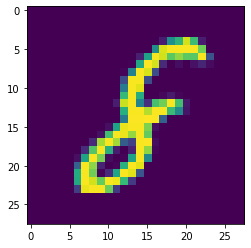

In [55]:
# (60000, 28, 28, 3)
n = 503
print(y_train[n])
plt.imshow(x_train[n])

In [56]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [59]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 838us/step - loss: 0.4046 - accuracy: 0.8748 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 2/5
60000/60000 [==============================] - 55s 914us/step - loss: 0.1443 - accuracy: 0.9584 - val_loss: 0.0517 - val_accuracy: 0.9826
Epoch 3/5
60000/60000 [==============================] - 54s 904us/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.0408 - val_accuracy: 0.9859
Epoch 4/5
60000/60000 [==============================] - 50s 832us/step - loss: 0.0907 - accuracy: 0.9732 - val_loss: 0.0397 - val_accuracy: 0.9864
Epoch 5/5
60000/60000 [==============================] - 50s 825us/step - loss: 0.0774 - accuracy: 0.9767 - val_loss: 0.0357 - val_accuracy: 0.9875
Test loss: 0.03571304402466776
Test accuracy: 0.987500011920929
